In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Starting block

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 17.0 MB/s eta 0:00:00


https://towardsdatascience.com/interpreting-image-classification-model-with-lime-1e7064a2f2e5

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9528e0a01b410615932c8a9a6aa2150728ad407cfb515163d7c6099a033c8400
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
'''Importing necessary libraries and modules'''

## Machine learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Supporting libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import gc
from sys import getsizeof
import datetime
import visualkeras
from lime import lime_image
from skimage.segmentation import mark_boundaries

## Confusion Matrix and Classification report libraries
from sklearn.metrics import plot_confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## GradCam libraries
from keras.models import Model

# Dataset Preparation and optimisation

In [ ]:
gc.enable()

In [ ]:
'''Importing files from drive'''

headpath = "/content/drive/MyDrive/Final_Project/Dataset"
train = np.load(os.path.join(headpath,"train2.npy"),allow_pickle=True)

In [ ]:
# train = np.concatenate([train[:534],train[2236+1:]])

In [ ]:
# np.save(os.path.join(headpath,"testm.npy"),train)

In [ ]:
# del(train1)

In [ ]:
# test.__sizeof__()

In [ ]:
validation = np.load(os.path.join(headpath,"val2.npy"),allow_pickle=True)

In [ ]:
test = np.load(os.path.join(headpath,"test2.npy"),allow_pickle=True)

label_list = ['bag', 'fight', 'gun', 'knife', 'normal', 'stealing']


In [ ]:
np.random.shuffle(train)
np.random.shuffle(validation)
np.random.shuffle(test)

In [ ]:
train_features = [i[0] for i in train]
train_classes = [i[1]  if i[1][0]==0 else [i[1][0]-1] for i in train]

test_features = [i[0] for i in test]
test_classes = [i[1]  if i[1][0]==0 else [i[1][0]-1] for i in test]

validation_features = [i[0] for i in validation]
validation_classes = [i[1]  if i[1][0]==0 else [i[1][0]-1] for i in validation]

del(train,test,validation)
gc.collect()

0

In [ ]:

traint = np.array(validation_classes)
traint.flatten()
for i in range(7):
  print(np.count_nonzero(traint == i))

482
1528
488
422
1238
24
0


In [ ]:
X = np.array([np.array(val) for val in train_features])
Y = np.array(train_classes)
del(train_features,train_classes)

In [ ]:
A = np.array([np.array(val) for val in validation_features])
B = np.array(validation_classes)
del(validation_features,validation_classes)

In [ ]:
E = np.array([np.array(val) for val in test_features])
F = np.array(test_classes)
del(test_features,test_classes)
gc.collect()

0

In [ ]:
# del(train,test,validation)
# del(train_features,train_classes,test_features,test_classes,validation_features,validation_classes)
# gc.collect()

In [ ]:
# # '''Importing files from drive'''

# headpath = "/content/drive/MyDrive/Currency identification dataset"
# dataset = np.load(os.path.join(headpath,"all-dataset.npy"),allow_pickle=True)

# label_list = ['10-New', '10-Old', '100-New', '100-Old', '20-New', '20-Old', '200', '2000', '50-New', '50-Old', '500', 'Not-Currency']

# train , test , validation = [] , [] , []
# train_per , test_per , validation_per = 700,150,150
# classCount = 11
# for i in range(0,classCount):
#   for i in dataset[i*1000:(i*1000+train_per)]:
#     train.append(i)
# for i in range(0,classCount):
#   for i in dataset[((i*1000)+train_per):((i*1000)+train_per+test_per)]:
#     validation.append(i)
# for i in range(0,classCount):
#   for i in dataset[(i*1000+train_per+test_per):(i*1000+train_per+test_per+validation_per)]:
#     test.append(i)

# del(dataset)
# gc.collect()

# train_features = [np.array(i[0]) for i in train]
# train_classes = [np.array(i[1]) for i in train]

# test_features = [np.array(i[0]) for i in test]
# test_classes = [np.array(i[1]) for i in test]

# validation_features = [np.array(i[0]) for i in validation]
# validation_classes = [np.array(i[1]) for i in validation]

# # X = np.array([np.array(cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)) for src in train_features])
# # A = np.array([np.array(cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)) for src in validation_features])
# # E = np.array([np.array(cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)) for src in test_features])

# X = np.array([np.array(val) for val in train_features])
# A = np.array([np.array(val) for val in validation_features])
# E = np.array([np.array(val) for val in test_features])

# Y = np.array([val for val in train_classes])
# B = np.array([val for val in validation_classes])
# F = np.array([val for val in test_classes])

In [ ]:
# #Checking random images with labels
# def checkdata(features,classes,no=None):
#   no = random.randint(0,len(features)) if no == None else no
#   plt.imshow(features[no])
#   plt.title(label_list[int(classes[no])])
#   plt.show()

In [ ]:
# checkdata(E,F)

# Models

In [ ]:
# Analytical Functions

class ModelAnalysis():
  global label_list
  def __init__(self,model,dataset,history):
    self.model = model
    self.train = dataset[0]
    self.validation = dataset[1]
    self.test = dataset[2]
    self.trainingCallback = history

  def postAnalysis(self):
    def plotAccuracy():
      plt.plot(self.trainingCallback.history['accuracy'])
      plt.plot(self.trainingCallback.history['val_accuracy'])
      plt.title('Model accuracy')
      plt.ylabel('Accuracy')
      plt.xlabel('Epochs')
      plt.yticks(np.arange(0,1.1,0.1))
      plt.legend(['Training', 'Validation'])
      plt.show()

    def plotLoss():
      plt.plot(self.trainingCallback.history['loss'])
      plt.plot(self.trainingCallback.history['val_loss'])
      plt.title('Model loss')
      plt.ylabel('Loss')
      plt.xlabel('Epochs')
      plt.legend(['Training', 'Validation'])
      plt.show()

    def testing():
      result = self.model.evaluate(self.test[0],self.test[1], batch_size=32,verbose=0)
      print(f'\nTesting: \nLoss = {result[0]} \nAccuracy = {result[1]*100:.4f}\n')
    
    def confusionMatrix():
      predictions = self.model.predict(self.test[0],verbose=0)
      predictions = np.argmax(predictions, axis=1)

      figsize = (12,12)
      ConfusionMatrixDisplay.from_predictions(self.test[1],predictions,cmap='Blues',display_labels=label_list, normalize='true', ax=plt.subplots(figsize=figsize)[1])
      print(classification_report(self.test[1], predictions))
    
    plotAccuracy()
    plotLoss()
    testing()
    confusionMatrix()

  def GradCamAnalysis(self,layers,eps=0.5,rnd=None):
    def GradCam(model, img_array, layer_name, eps=1e-8):
      '''
      Creates a grad-cam heatmap given a model and a layer name contained with that model
      

      Args:
        model: tf model
        img_array: (img_width x img_width) numpy array
        layer_name: str


      Returns 
        uint8 numpy array with shape (img_height, img_width)

      '''

      gradModel = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output,
          model.output])
      
      with tf.GradientTape() as tape:
        # cast the image tensor to a float-32 data type, pass the
        # image through the gradient model, and grab the loss
        # associated with the specific class index
        inputs = tf.cast(img_array, tf.float32)
        (convOutputs, predictions) = gradModel(inputs)
        loss = predictions[:, 0]
      # use automatic differentiation to compute the gradients
      grads = tape.gradient(loss, convOutputs)
      
      # compute the guided gradients
      castConvOutputs = tf.cast(convOutputs > 0, "float32")
      castGrads = tf.cast(grads > 0, "float32")
      guidedGrads = castConvOutputs * castGrads * grads
      # the convolution and guided gradients have a batch dimension
      # (which we don't need) so let's grab the volume itself and
      # discard the batch
      convOutputs = convOutputs[0]
      guidedGrads = guidedGrads[0]
      # compute the average of the gradient values, and using them
      # as weights, compute the ponderation of the filters with
      # respect to the weights
      weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
      cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
    
      # grab the spatial dimensions of the input image and resize
      # the output class activation map to match the input image
      # dimensions
      (w, h) = (img_array.shape[2], img_array.shape[1])
      heatmap = cv2.resize(cam.numpy(), (w, h))
      # normalize the heatmap such that all values lie in the range
      # [0, 1], scale the resulting values to the range [0, 255],
      # and then convert to an unsigned 8-bit integer
      numer = heatmap - np.min(heatmap)
      denom = (heatmap.max() - heatmap.min()) + eps
      heatmap = numer / denom
      # heatmap = (heatmap * 255).astype("uint8")
      # return the resulting heatmap to the calling function
      return heatmap

    def sigmoid(x, a, b, c):
      return c / (1 + np.exp(-a * (x-b)))

    def superimpose(img_bgr, cam, thresh, emphasize=False):
      
      '''
      Superimposes a grad-cam heatmap onto an image for model interpretation and visualization.
      

      Args:
        image: (img_width x img_height x 3) numpy array
        grad-cam heatmap: (img_width x img_width) numpy array
        threshold: float
        emphasize: boolean

      Returns 
        uint8 numpy array with shape (img_height, img_width, 3)

      '''
      heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
      if emphasize:
          heatmap = sigmoid(heatmap, 50, thresh, 1)
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      
      hif = .8
      superimposed_img = heatmap * hif + img_bgr
      superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
      superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
      
      return superimposed_img_rgb

    #activation_layers = ['vgg.block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']
    activation_layers = layers
    rnd = rnd if rnd != None else random.randint(0,int(E.shape[0]))
    print(rnd)
    img = self.test[0][rnd]
    plt.figure(figsize=(15, 15))
    for i, layer in enumerate(activation_layers):
      grad_cam = GradCam(self.model, np.expand_dims(img, axis=0), layer)
      ax = plt.subplot(7, 5, i +1)
      plt.imshow(grad_cam)
      plt.title(layer)
      plt.axis("off")
    plt.tight_layout()

    plt.figure(figsize=(15, 15))
    for i, layer in enumerate(activation_layers):
      grad_cam = GradCam(self.model, np.expand_dims(img, axis=0), layer)
      grad_cam_emphasized = superimpose(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), grad_cam, eps, emphasize=True)
      ax = plt.subplot(7, 5, i +1)
      plt.imshow(grad_cam_emphasized)
      plt.title(layer)
      plt.axis("off")
    plt.tight_layout()

  def saveModel(self,architecture):
    self.architecture = architecture
    timing = datetime.datetime.now()
    fname = f"Identification-model-currency-{self.architecture}-{timing.strftime('%d-%b-%Y-%I-%M')}.h5"
    self.model.save(os.path.join(headpath,'Model',fname))
  
  def visualiseModel(self,compact=False):
    if compact:
      return visualkeras.layered_view(self.model, legend=True,max_z=150)
    else:
      return visualkeras.layered_view(self.model, legend=True)

  def LimeAnalysis(self,model,rnd = None,samples=100):
    rnd = rnd if rnd != None else random.randint(0,int(E.shape[0]))
    print(rnd)
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(self.test[0][rnd], self.model.predict,top_labels=3, hide_color=0, num_samples=samples)
    
    temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
    temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax2.imshow(mark_boundaries(temp_2, mask_2))
    ax1.axis('off')
    ax2.axis('off')

## Simple CNN

In [ ]:
cnn_model = keras.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3),(2,2), activation='relu', input_shape=(200, 300,3),padding="same"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu',padding="same"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu',padding="same"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu',padding="same"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(512, (3, 3), activation='relu',padding="same"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.GlobalAveragePooling2D())
# cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1500, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(750, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(350, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(180, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(90, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(45, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(6, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 50, 75, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
cnn_model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer= 'Adam', metrics=['accuracy'])

In [ ]:
fit_model = cnn_model.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
 22/441 [>.............................] - ETA: 14:33 - loss: 1.5727 - accuracy: 0.3636

KeyboardInterrupt: ignored

In [ ]:
CNN = ModelAnalysis(cnn_model,[(X,Y),(A,B),(E,F)],fit_model)

In [ ]:
CNN.postAnalysis()

1284


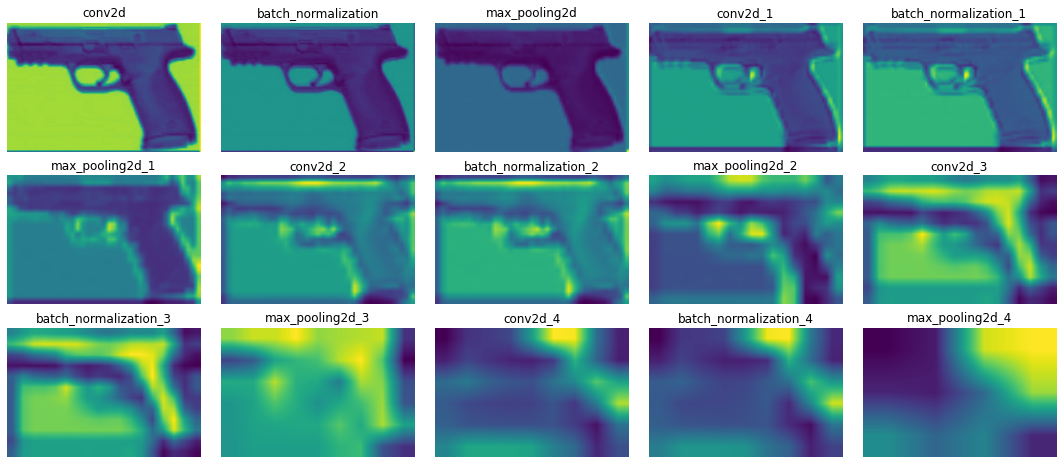

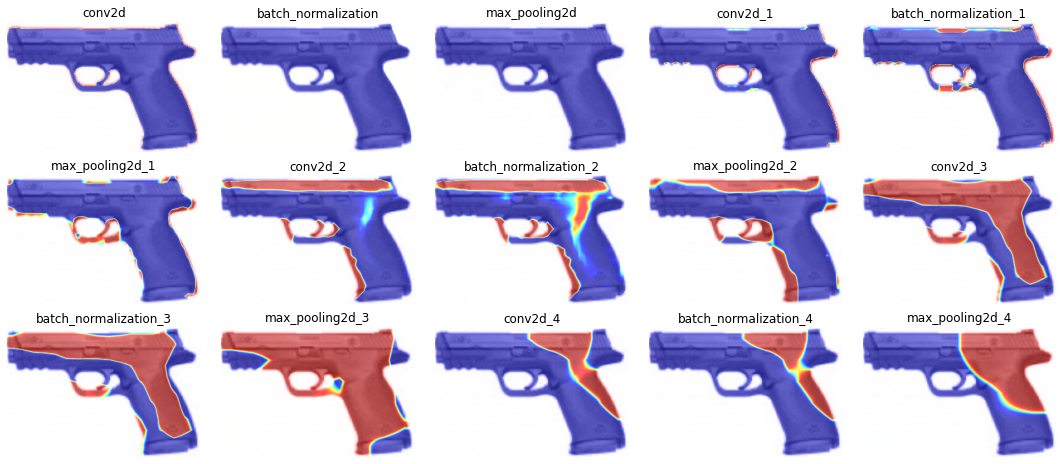

In [ ]:
actlayers = ['conv2d', 'batch_normalization', 'max_pooling2d', 'conv2d_1', 'batch_normalization_1', 'max_pooling2d_1', 'conv2d_2', 'batch_normalization_2', 'max_pooling2d_2', 'conv2d_3', 'batch_normalization_3', 'max_pooling2d_3', 'conv2d_4', 'batch_normalization_4', 'max_pooling2d_4']
CNN.GradCamAnalysis(actlayers,eps=0.5)

3878


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


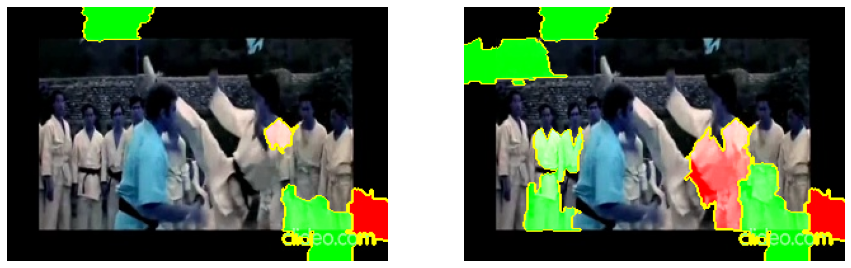

In [ ]:
CNN.LimeAnalysis(cnn_model)

In [ ]:
CNN.saveModel('CNN')

## Mobilenetv2

In [ ]:
mobilenetv2base = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(200,300,3),weights='imagenet',include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenetv2base.trainable = False

In [ ]:
mobilenetv2base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 150, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 100, 150, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
last_layer = mobilenetv2base.output

downlayers = tf.keras.layers.Flatten()(last_layer)
# downlayers = tf.keras.layers.Dense(1024,activation='relu')(downlayers)
downlayers = tf.keras.layers.Dropout(0.2)(downlayers)
downlayers = tf.keras.layers.Dense(6,activation='softmax')(downlayers)

mobilenetv2 = Model(inputs=mobilenetv2base.input, outputs=downlayers)

mobilenetv2.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
mobilenetv2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 150, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 100, 150, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
mobilenethist = mobilenetv2.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
441/441 [==============================] - 40s 68ms/step - loss: 0.6875 - accuracy: 0.9370 - val_loss: 5.7427 - val_accuracy: 0.7119
Epoch 2/2
441/441 [==============================] - 28s 62ms/step - loss: 0.1960 - accuracy: 0.9801 - val_loss: 13.1054 - val_accuracy: 0.5516


In [ ]:
MOBILENETV2 = ModelAnalysis(mobilenetv2,[(X,Y),(A,B),(E,F)],mobilenethist)

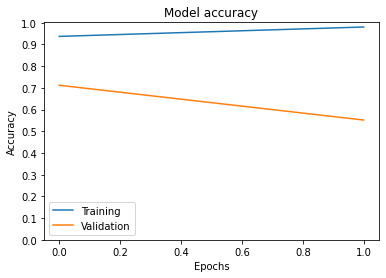

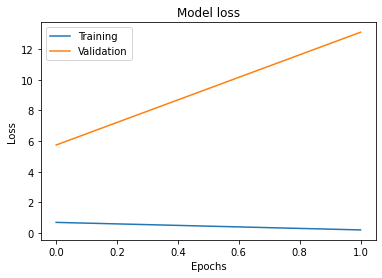


Testing: 
Loss = 22.010440826416016 
Accuracy = 54.4971

              precision    recall  f1-score   support

           0       0.23      0.11      0.15       534
           1       0.95      0.92      0.94      1509
           2       0.30      0.96      0.45       591
           3       0.38      1.00      0.55       100
           4       0.82      0.02      0.03      1197
           5       0.39      1.00      0.56        16

    accuracy                           0.54      3947
   macro avg       0.51      0.67      0.45      3947
weighted avg       0.70      0.54      0.47      3947



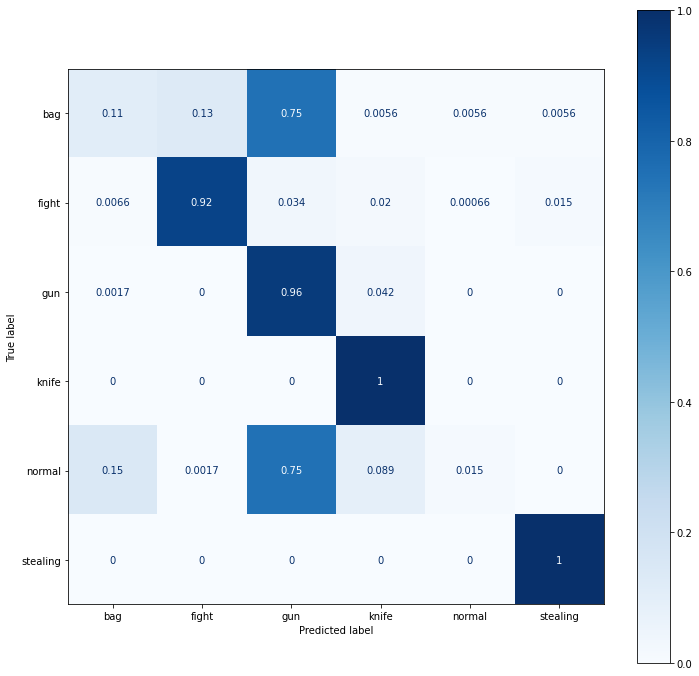

In [ ]:
MOBILENETV2.postAnalysis()

## ResNet50

In [ ]:
resnetbase = tf.keras.applications.ResNet50(input_shape=(200,300,3),weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnetbase.trainable = False

In [ ]:
resnetbase.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
last_layer = resnetbase.output

downlayers = tf.keras.layers.Flatten()(last_layer)
downlayers = tf.keras.layers.Dropout(0.2)(downlayers)
downlayers = tf.keras.layers.Dense(6,activation='softmax')(downlayers)

resnet = Model(inputs=resnetbase.input, outputs=downlayers)

resnet.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history = resnet.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
441/441 [==============================] - 90s 178ms/step - loss: 0.5509 - accuracy: 0.9778 - val_loss: 12.8502 - val_accuracy: 0.7410
Epoch 2/2
441/441 [==============================] - 74s 167ms/step - loss: 0.1276 - accuracy: 0.9946 - val_loss: 14.8953 - val_accuracy: 0.7857


In [ ]:
RESNET50 = ModelAnalysis(resnet,[(X,Y),(A,B),(E,F)],history)

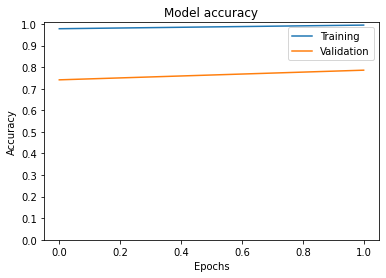

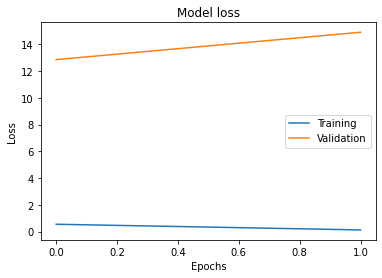


Testing: 
Loss = 20.14940643310547 
Accuracy = 61.8191

              precision    recall  f1-score   support

           0       0.38      0.49      0.43       534
           1       0.87      0.81      0.84      1509
           2       0.74      1.00      0.85       591
           3       0.25      1.00      0.39       100
           4       0.41      0.21      0.28      1197
           5       0.52      1.00      0.68        16

    accuracy                           0.62      3947
   macro avg       0.53      0.75      0.58      3947
weighted avg       0.63      0.62      0.60      3947



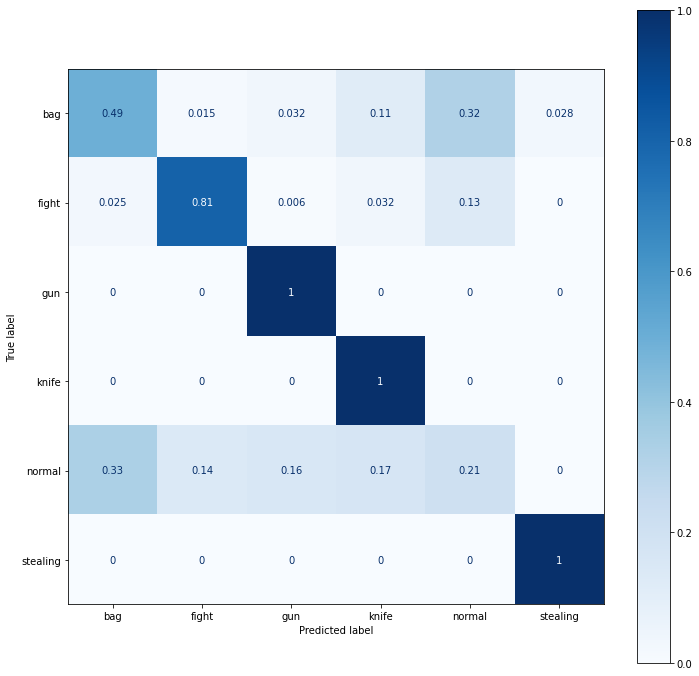

In [ ]:
RESNET50.postAnalysis()

In [ ]:
RESNET50.saveModel('ResNet')

## ResNet50V2

In [ ]:
resnetv2base = tf.keras.applications.ResNet50V2(input_shape=(200,300,3),weights='imagenet',include_top=False)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
resnetv2base.trainable = False

In [ ]:
resnetv2base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
last_layer = resnetv2base.output

downlayers = tf.keras.layers.Flatten()(last_layer)
downlayers = tf.keras.layers.Dropout(0.2)(downlayers)
downlayers = tf.keras.layers.Dense(6,activation='softmax')(downlayers)

resnetv2 = Model(inputs=resnetv2base.input, outputs=downlayers)

resnetv2.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
resnetv2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
history = resnetv2.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
441/441 [==============================] - 81s 158ms/step - loss: 106.6981 - accuracy: 0.8813 - val_loss: 554.6655 - val_accuracy: 0.6363
Epoch 2/2
441/441 [==============================] - 65s 147ms/step - loss: 46.6566 - accuracy: 0.9473 - val_loss: 429.6413 - val_accuracy: 0.7465


In [ ]:
RESNET50V2 = ModelAnalysis(resnetv2,[(X,Y),(A,B),(E,F)],history)

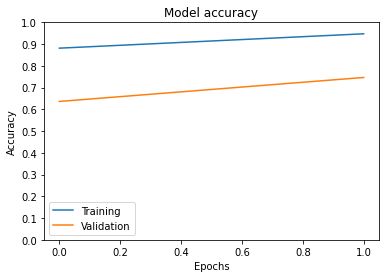

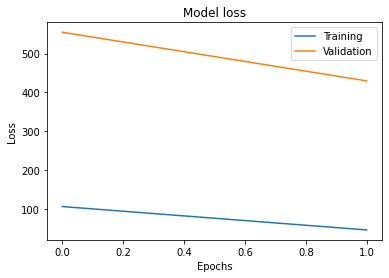


Testing: 
Loss = 697.039306640625 
Accuracy = 75.1203

              precision    recall  f1-score   support

           0       0.15      0.04      0.06       534
           1       0.83      0.91      0.87      1509
           2       0.51      0.96      0.66       591
           3       0.77      1.00      0.87       100
           4       1.00      0.74      0.85      1197
           5       0.67      1.00      0.80        16

    accuracy                           0.75      3947
   macro avg       0.65      0.77      0.68      3947
weighted avg       0.74      0.75      0.72      3947



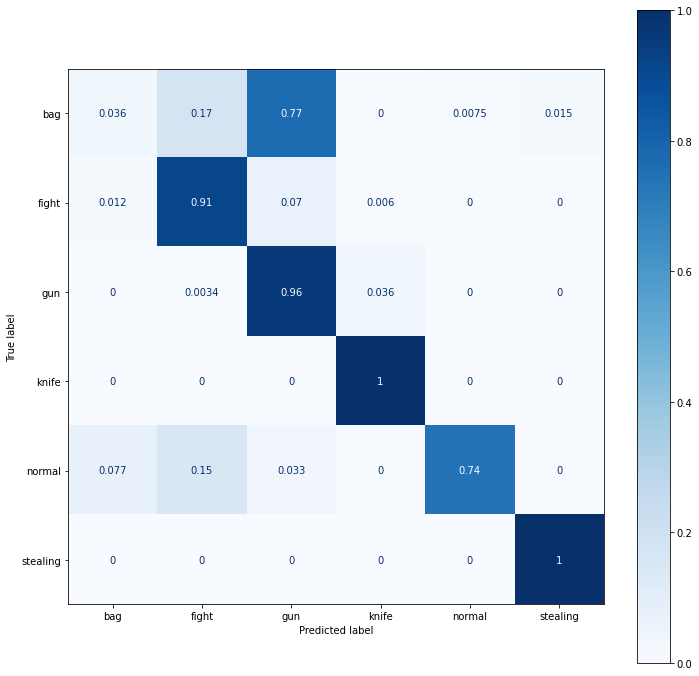

In [ ]:
RESNET50V2.postAnalysis()

## VGG16

In [ ]:
vggbase = tf.keras.applications.VGG16(input_shape=(200,300,3),weights='imagenet',include_top=False)
vggbase.trainable = False

In [ ]:
vggbase.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 75, 128)       0     

In [ ]:
last_layer = vggbase.output

downlayers = tf.keras.layers.Flatten()(last_layer)
downlayers = tf.keras.layers.Dropout(0.2)(downlayers)
downlayers = tf.keras.layers.Dense(6,activation='softmax')(downlayers)

vgg16 = Model(inputs=vggbase.input, outputs=downlayers)

vgg16.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 75, 128)       0     

In [ ]:
vgg16fit = vgg16.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
441/441 [==============================] - 122s 254ms/step - loss: 0.8039 - accuracy: 0.9708 - val_loss: 10.5547 - val_accuracy: 0.7623
Epoch 2/2
441/441 [==============================] - 113s 256ms/step - loss: 0.2064 - accuracy: 0.9943 - val_loss: 12.3138 - val_accuracy: 0.7379


In [ ]:
VGG16 = ModelAnalysis(vgg16,[(X,Y),(A,B),(E,F)],vgg16fit)

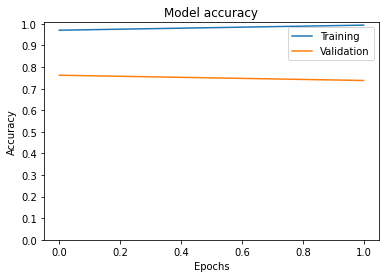

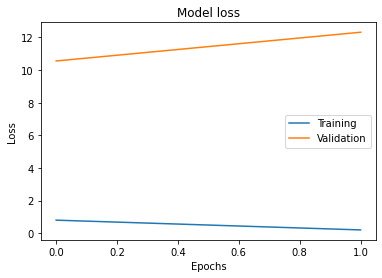


Testing: 
Loss = 30.239883422851562 
Accuracy = 59.0575

              precision    recall  f1-score   support

           0       0.32      0.10      0.15       534
           1       0.94      0.71      0.81      1509
           2       0.48      1.00      0.65       591
           3       0.40      1.00      0.57       100
           4       0.44      0.43      0.43      1197
           5       1.00      1.00      1.00        16

    accuracy                           0.59      3947
   macro avg       0.60      0.70      0.60      3947
weighted avg       0.62      0.59      0.58      3947



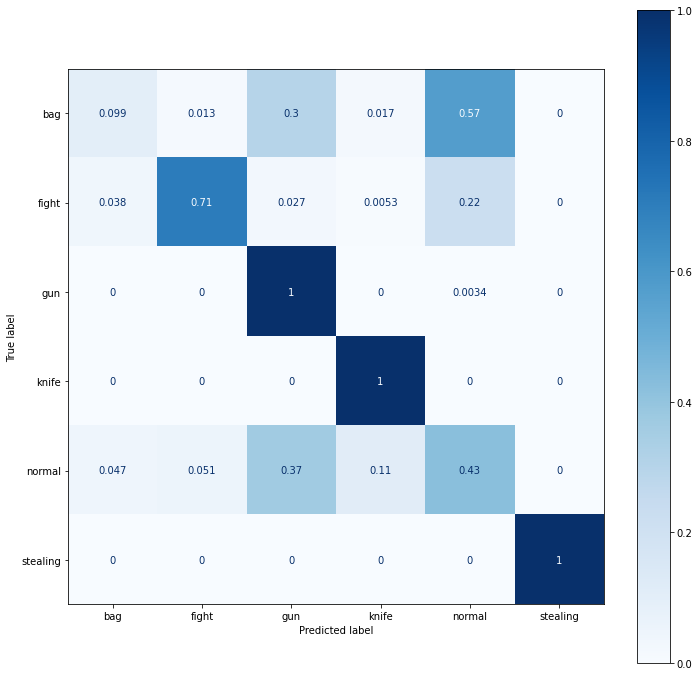

In [ ]:
VGG16.postAnalysis()

In [ ]:
VGG16.saveModel('VGG16')

## VGG19

In [ ]:
vgg19base = tf.keras.applications.VGG19(input_shape=(200,300,3),weights='imagenet',include_top=False)
vgg19base.trainable = False 

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg19base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 75, 128)       0     

In [ ]:
last_layer = vgg19base.output

downlayers = tf.keras.layers.Flatten()(last_layer)
downlayers = tf.keras.layers.Dropout(0.2)(downlayers)
downlayers = tf.keras.layers.Dense(6,activation='softmax')(downlayers)

vgg19 = Model(inputs=vgg19base.input, outputs=downlayers)

vgg19.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 75, 128)       0     

In [ ]:
vgg19fit = vgg19.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
441/441 [==============================] - 148s 313ms/step - loss: 0.6656 - accuracy: 0.9713 - val_loss: 5.0965 - val_accuracy: 0.8517
Epoch 2/2
441/441 [==============================] - 133s 302ms/step - loss: 0.1530 - accuracy: 0.9941 - val_loss: 5.9196 - val_accuracy: 0.8833


In [ ]:
VGG19 = ModelAnalysis(vgg19,[(X,Y),(A,B),(E,F)],vgg19fit)

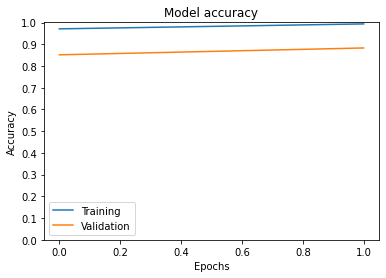

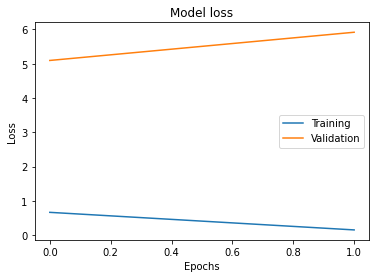


Testing: 
Loss = 9.877509117126465 
Accuracy = 81.7076

              precision    recall  f1-score   support

           0       0.32      0.13      0.19       534
           1       0.89      0.97      0.92      1509
           2       0.91      1.00      0.95       591
           3       0.75      0.99      0.85       100
           4       0.77      0.83      0.80      1197
           5       1.00      1.00      1.00        16

    accuracy                           0.82      3947
   macro avg       0.77      0.82      0.79      3947
weighted avg       0.78      0.82      0.79      3947



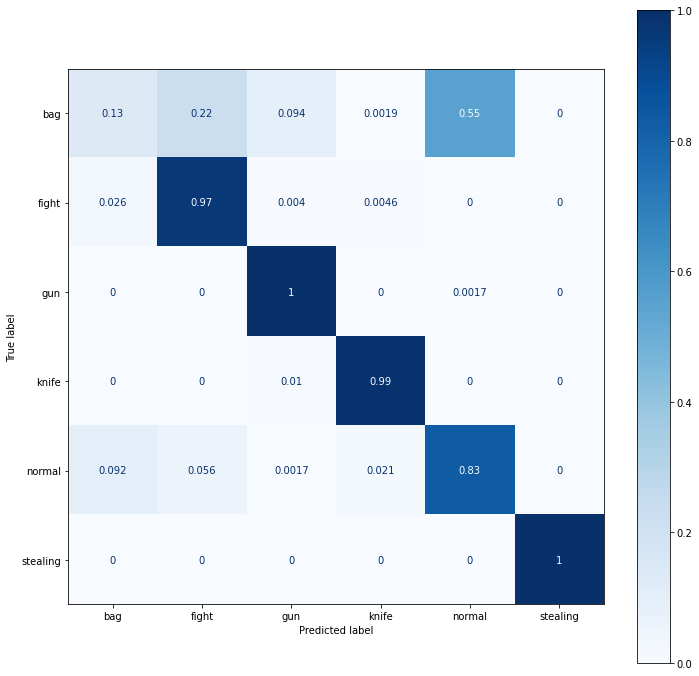

In [ ]:
VGG19.postAnalysis()

## Xception

In [ ]:
Xceptionbase = tf.keras.applications.Xception(input_shape=(200,300,3),weights='imagenet',include_top=False)
Xceptionbase.trainable = False

In [ ]:
Xceptionbase.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 149, 32)  864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 149, 32)  128        ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
last_layer = Xceptionbase.output

downlayers = tf.keras.layers.Flatten()(last_layer)
downlayers = tf.keras.layers.Dropout(0.2)(downlayers)
downlayers = tf.keras.layers.Dense(6,activation='softmax')(downlayers)

xception = Model(inputs=Xceptionbase.input, outputs=downlayers)

xception.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
xception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 149, 32)  864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 149, 32)  128        ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

In [ ]:
xceptionfit = xception.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

Epoch 1/2
441/441 [==============================] - 115s 237ms/step - loss: 33.9370 - accuracy: 0.8447 - val_loss: 214.9043 - val_accuracy: 0.5536
Epoch 2/2
441/441 [==============================] - 102s 231ms/step - loss: 17.1582 - accuracy: 0.9246 - val_loss: 176.5412 - val_accuracy: 0.5550


In [ ]:
XCEPTION = ModelAnalysis(xception,[(X,Y),(A,B),(E,F)],xceptionfit)

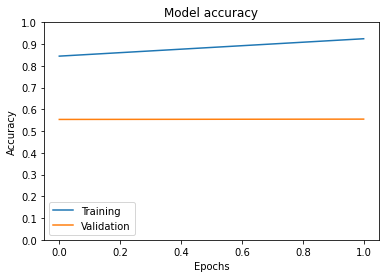

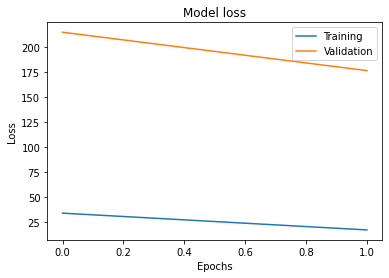


Testing: 
Loss = 239.37840270996094 
Accuracy = 55.7639

              precision    recall  f1-score   support

           0       0.10      0.07      0.08       534
           1       0.84      0.61      0.71      1509
           2       0.54      0.73      0.62       591
           3       0.14      0.99      0.25       100
           4       0.71      0.58      0.64      1197
           5       1.00      1.00      1.00        16

    accuracy                           0.56      3947
   macro avg       0.56      0.66      0.55      3947
weighted avg       0.64      0.56      0.58      3947



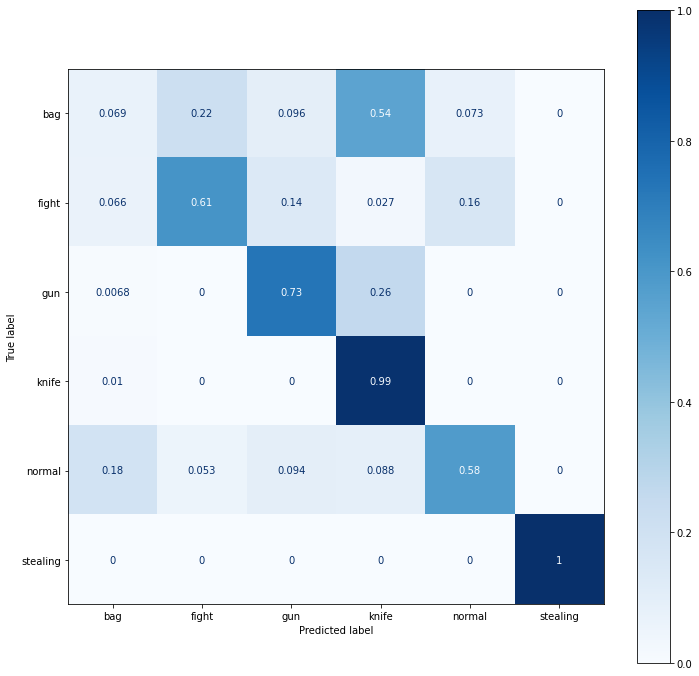

In [ ]:
XCEPTION.postAnalysis()

## AlexNet

In [ ]:
alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(200,300,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    # keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    #keras.layers.Dense(4096, activation='relu'),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(4096, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])

In [ ]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 73, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 48, 73, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 36, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 36, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 23, 36, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
alexnet.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
alexnetModel = alexnet.fit(X,Y,batch_size=32,validation_data=(A,B),epochs=2,shuffle=True)

In [ ]:
ALEXNET = ModelAnalysis(alexnet,[(X,Y),(A,B),(E,F)],alexnetModel)

In [ ]:
ALEXNET.postAnalysis()

# Rest of testing 

## Image Testing

1/1 [==============================] - 0s 478ms/step


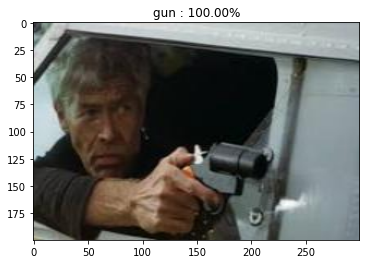

1/1 [==============================] - 0s 19ms/step


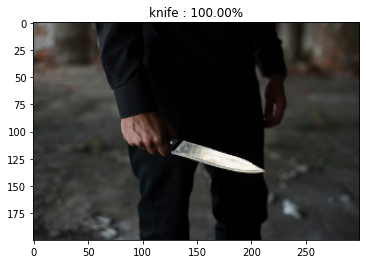

1/1 [==============================] - 0s 16ms/step


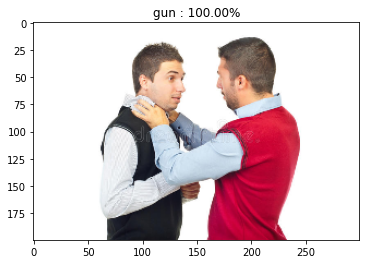

1/1 [==============================] - 0s 17ms/step


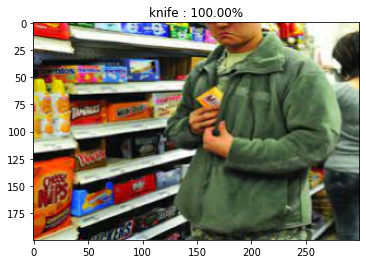

In [ ]:
images = os.listdir()
for i in [".config","drive",'.ipynb_checkpoints','sample_data']:
  try:
    images.remove(i)
  except Exception:
    pass

#images = [ E[random.randint(0,int(E.shape[0]))] for i in range(10)]
for i in images:
  # print(i)
  test_img = cv2.imread(i)
  #test_img = i
  try:
    if test_img.shape[0] > test_img.shape[1]:
      test_img = cv2.rotate(test_img, cv2.ROTATE_90_CLOCKWISE)
    test_img = np.squeeze(test_img)
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(300,200))
    show_img = test_img.copy()
    test_img = np.array([np.array(test_img)])

    y_out = vgg19.predict(test_img)
    plt.figure()
    plt.imshow(show_img)
    y_out = y_out*100
    index = np.argmax(y_out)
    label = f"{label_list[np.argmax(y_out)]} : {y_out[0][index]:.2f}%"
    

    plt.title(label)
    plt.show()
  except Exception:
    print(f"Error happend for image {i}")
    continue
  

1/1 [==============================] - 0s 20ms/step


Text(0.5, 1.0, 'knife : 100.00%')

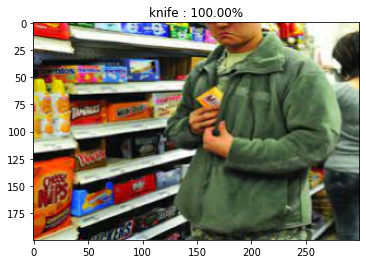

In [ ]:
test_img = cv2.imread("test4.jpg")
test_img = np.squeeze(test_img)
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img,(300,200))
show_img = test_img.copy()
# test_img =  E[474]
# show_img = test_img
test_img = np.array([np.array(test_img)])

y_out = vgg19.predict(test_img)
y_out = y_out*100
index = np.argmax(y_out)
plt.imshow(show_img)
label = f"{label_list[np.argmax(y_out)]} : {y_out[0][index]:.2f}%"
plt.title(label)

## Multiple Input

https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, concatenate
from tensorflow.keras.models import Model

image_input = Input((64,64,3))
x = Conv2D(32, kernel_size=8, strides=4)(image_input)
x = Flatten()(x)
x = Dense(64)(x)

vector_input = Input((10,))
y = Dense(64)(vector_input)

z = concatenate([x, y])
z = Dense(64)(z)
z = Activation('softmax')(z)

model = Model([image_input, vector_input], [z])

In [ ]:
model.summary()

In [ ]:
visualkeras.layered_view(model, legend=True,max_z=150)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
import time

In [ ]:
# random.shuffle(dataset)
test_dataset = []
per = 500
classes_count = 11
for i in range(0,classes_count):
  for i in dataset[i*1000:(i*1000+per)]:
    test_dataset.append(i)

random.shuffle(test_dataset)

feature = [np.array(i[0]) for i in test_dataset]
label = [np.array(i[1]) for i in test_dataset]

X = np.array([np.array(val) for val in feature])
Y = np.array(label)

In [ ]:
kfold = KFold(5)

for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  # print('train: %s, test: %s' % (len(X_train), len(X_test)))

  cnn_model = keras.Sequential()
  cnn_model.add(layers.Conv2D(32, (3, 3),(2,2), activation='relu', input_shape=(200, 300,3),padding="same"))
  cnn_model.add(layers.BatchNormalization())
  cnn_model.add(layers.MaxPooling2D((2, 2)))
  cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu',padding="same"))
  cnn_model.add(layers.BatchNormalization())
  cnn_model.add(layers.MaxPooling2D((2, 2)))
  cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu',padding="same"))
  cnn_model.add(layers.BatchNormalization())
  cnn_model.add(layers.MaxPooling2D((2, 2)))
  cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu',padding="same"))
  cnn_model.add(layers.BatchNormalization())
  cnn_model.add(layers.MaxPooling2D((2, 2)))
  cnn_model.add(layers.Conv2D(512, (3, 3), activation='relu',padding="same"))
  cnn_model.add(layers.BatchNormalization())
  cnn_model.add(layers.MaxPooling2D((2, 2)))
  cnn_model.add(layers.GlobalAveragePooling2D())
  cnn_model.add(layers.Dense(180, activation='relu'))
  cnn_model.add(layers.Dropout(0.2))
  cnn_model.add(layers.Dense(90, activation='relu'))
  cnn_model.add(layers.Dropout(0.2))
  cnn_model.add(layers.Dense(48, activation='relu'))
  cnn_model.add(layers.Dropout(0.2))
  cnn_model.add(layers.Dense(12, activation='softmax'))

  cnn_model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

  fit_model = cnn_model.fit(X_train,y_train,batch_size=32,epochs=10,shuffle=True,verbose=0)

  results = cnn_model.evaluate(X_test, y_test, batch_size=32,verbose=0)
  print(results)

In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(E[200], vgg16.predict,top_labels=3, hide_color=0, num_samples=100)

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')